In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set(style="whitegrid")

In [12]:
from msr.data.download.mimic import load_mimic_raw_tensors_for_split, FS
from msr.data.measurements import MimicMeasurement

data, targets = load_mimic_raw_tensors_for_split("val", "sbp_dbp_avg")
data, targets = data.numpy(), targets.numpy()
sample = data[222]
# sample = sample[:2500]
ppg, ecg = sample.T
measurement = MimicMeasurement(ppg, ecg, FS)
measurement.set_beats(source_channel='ecg', align_peaks_loc=True)
# measurement.set_windows(13, 11)
measurement.set_agg_beat()
ppg_sig = measurement['ppg']

In [3]:
from funcs import get_figs_for_thesis_periodic, plot_zoomed_samples

prefix = "ppg_"
figs = get_figs_for_thesis_periodic(ppg_sig, prefix)

for name, fig in figs.items():
    fig.savefig(f"plots/{name}.pdf", bbox_inches="tight")

In [6]:
wsw = ppg_sig.get_whole_signal_waveform()
wsf = ppg_sig.extract_features()
abw = ppg_sig.get_agg_beat_waveform()
abf = ppg_sig.get_agg_beat_features()

wsw.shape, wsf.shape, abw.shape, abf.shape

((7500,), (329,), (100,), (44,))

In [43]:
fig = plot_zoomed_samples(ppg_sig)

In [45]:
fig.savefig(f"plots/waveform_example.pdf", bbox_inches="tight")

In [50]:
10 * 125

1250

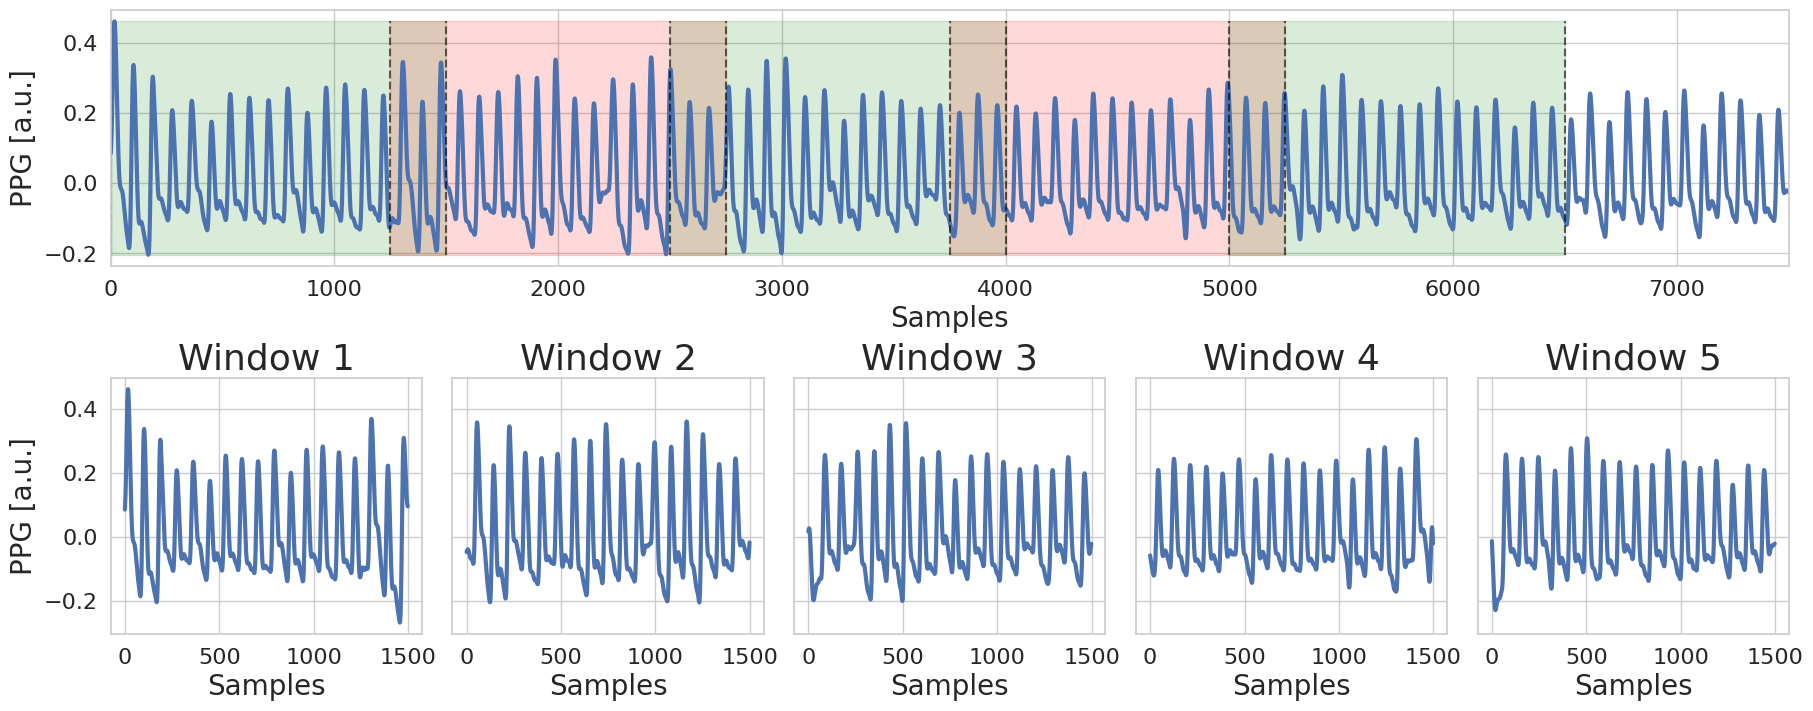

In [54]:
sig = ppg_sig.get_slice(0, 60)
sig.set_beats()
sig.set_windows(12, 10)
fig = sig.plot_segmentation(mode="windows", use_samples=True)
fig.savefig(f"plots/windows_waveform_example.pdf", bbox_inches="tight")

In [24]:
def plot_zoomed_samples(signal, axes=None):
    return_fig = False
    if axes is None:
        fig, axes = plt.subplots(1, 2, figsize=signal.fig_params["fig_size"])
        return_fig = True
        
    sig = signal.get_slice(0, 8)
    
    st, wt = 0.6, 0.75
    et = st + wt
    s, e = int(st * sig.fs), int(et * sig.fs)
    
    sig.plot(0, 10, scatter=True, line=False, use_samples=True, ax=axes[0], label=None, title=None, lw=1)
    samples = np.arange(s, e)
    # sig.plot(st, wt, scatter=True, line=False, use_samples=True, ax=axes[1], label=None, title=None, lw=2.5)
    axes[1].scatter(samples, sig.cleaned[s:e], s=sig.fig_params['marker_size'])
    axes[0].plot(sig.cleaned, lw=0.25, color='black')
    
    axes[0].fill_between([s, e], sig.min, sig.max, alpha=sig.fig_params["fill_alpha"], color="green", label="Zoomed segment")
    axes[1].set_ylabel("")
    axes[1].plot(samples, sig.cleaned[s:e], lw=0.25, color='black')
    axes[0].legend()
    
    axes[1].set_xlabel("Samples", fontsize=sig.fig_params["label_size"])
    axes[1].tick_params(axis="both", which="major", labelsize=sig.fig_params["tick_size"])
    
    plt.tight_layout()
    plt.close()
    if return_fig:
        return fig

def plot_zoomed_samples_for_signals(signals):
    nrows = len(signals)
    w, h = signals[0].fig_params["fig_size"]
    fig, all_axes = plt.subplots(nrows, 2, figsize=(w, h*nrows))
    for signal, axes in zip(signals, all_axes):
        plot_zoomed_samples(signal, axes=axes)
    all_axes[0][0].set_xlabel("")
    all_axes[0][1].set_xlabel("")
    
    return fig

In [25]:
signals = [measurement['ppg'], measurement['ecg']]

zoomed_fig = plot_zoomed_samples_for_signals(signals)

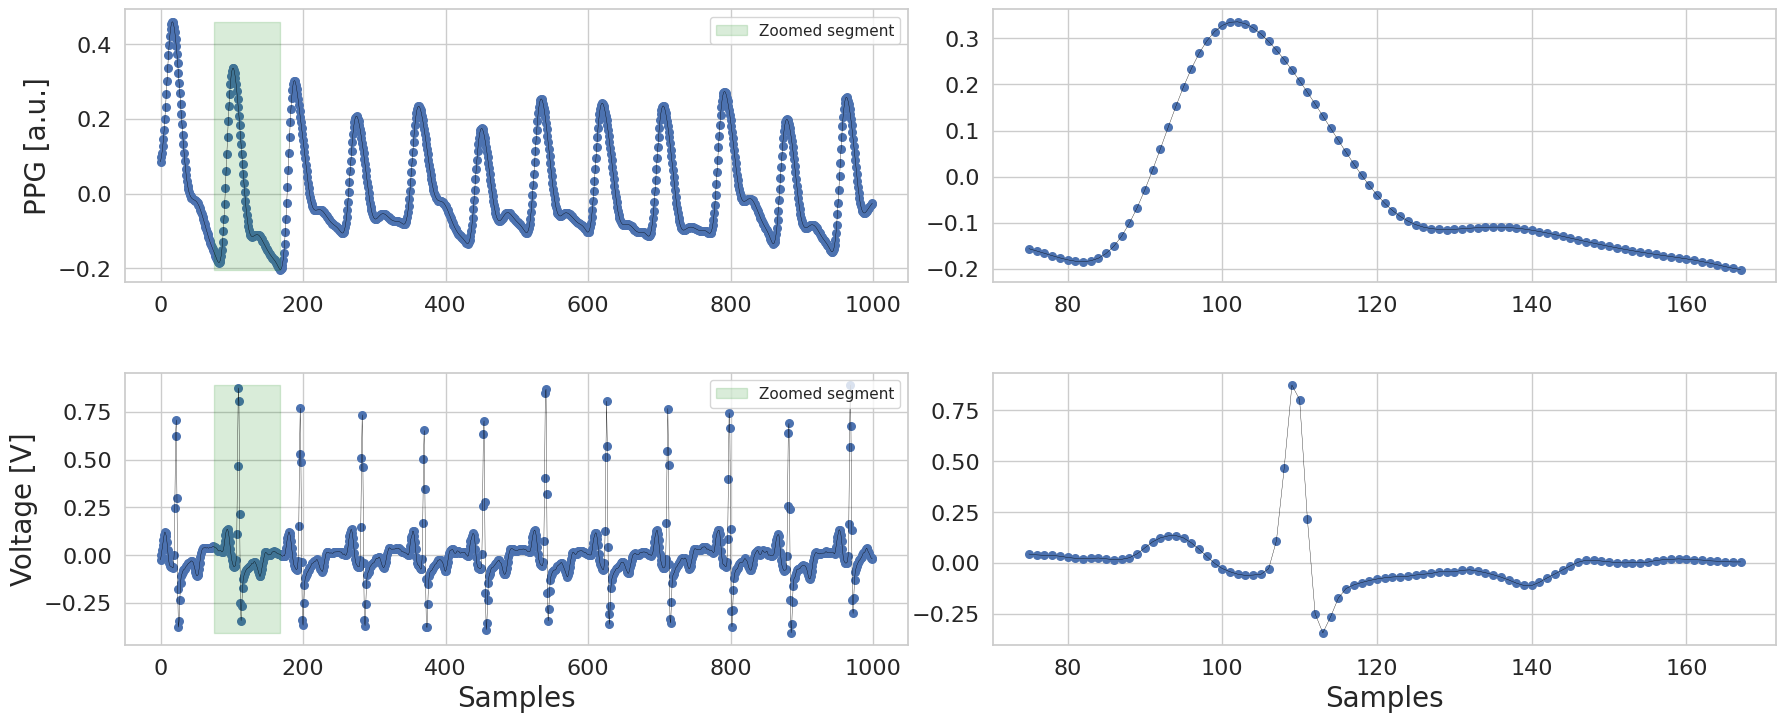

In [26]:
zoomed_fig

In [27]:
zoomed_fig.savefig(f"plots/waveform_example.pdf", bbox_inches="tight")

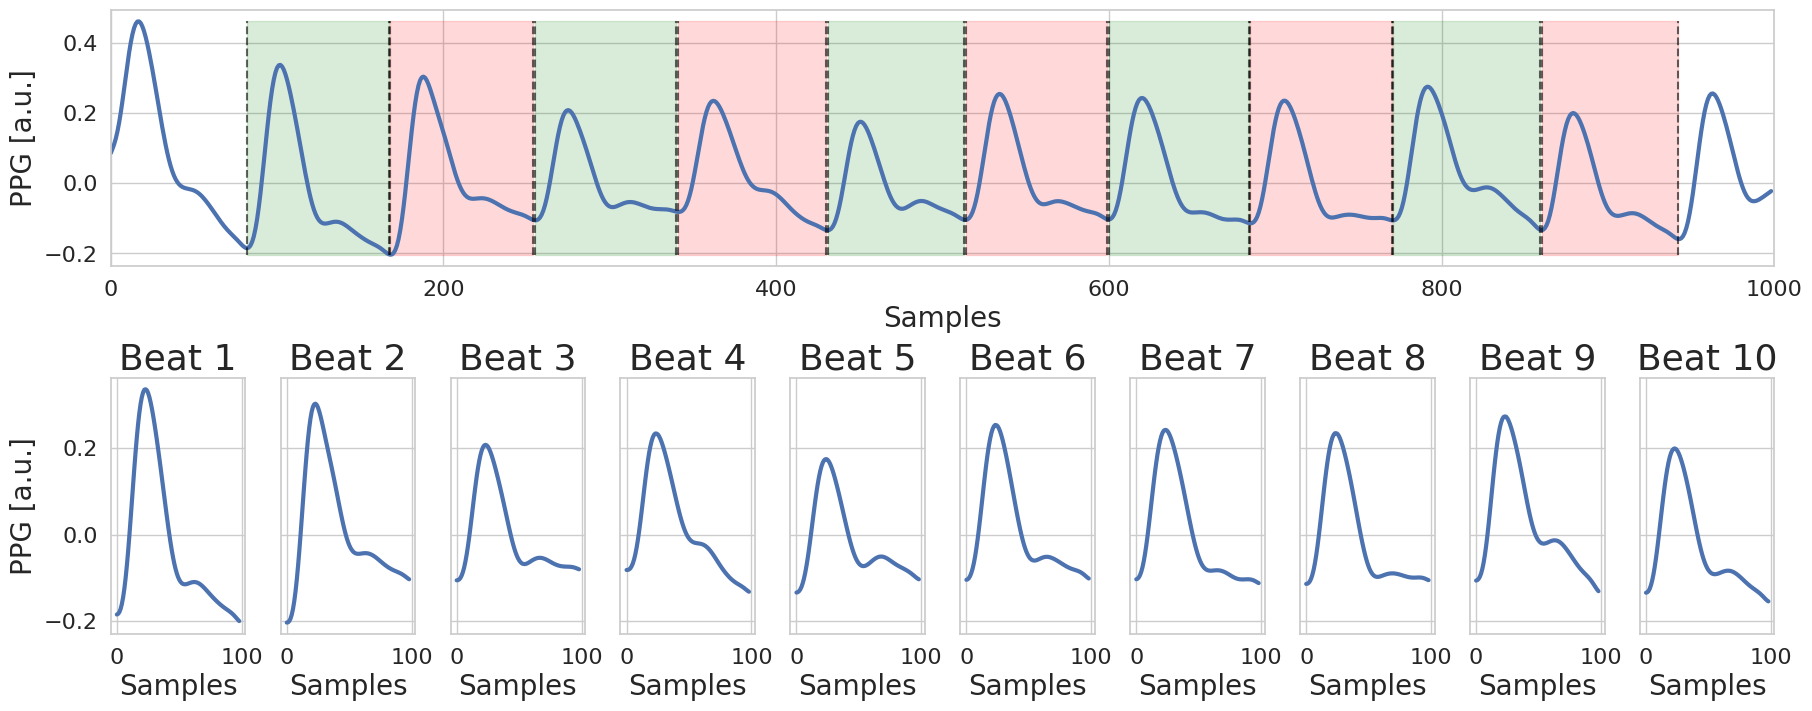

In [48]:
sig = ppg_sig.get_slice(0, 8)
sig.set_beats()
sig.set_windows(12, 11)
fig = sig.plot_segmentation(mode="beats", use_samples=True)
fig.savefig(f"plots/beats_waveform_example.pdf", bbox_inches="tight")